<a href="https://colab.research.google.com/github/Raoina/Spectra-2-Image/blob/main/notebooks/Image_Transformation/Resizing_the_spider_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import zipfile
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


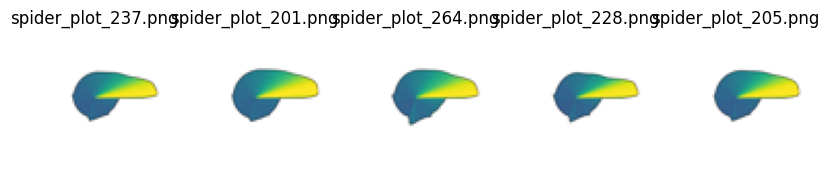

Resized images saved to /content/resized_images.zip


In [11]:
import os
import zipfile
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

images_path = '/content/drive/MyDrive/Si-Ware/3h_1122_spider_plots'
image_files = [f for f in os.listdir(images_path) if os.path.isfile(os.path.join(images_path, f))]

resized_images = []
for img_file in image_files:
    img_path = os.path.join(images_path, img_file)
    try:
        # Open image using PIL
        img = Image.open(img_path)
        # Resize the image to 65x65
        resized_img = np.array(img.resize((65, 65)))  # Resize and convert to numpy array
        resized_images.append((img_file, resized_img))
    except Exception as e:
        print(f"Could not process image {img_file}: {e}")

# Plot the first 5 resized images
plt.figure(figsize=(10, 2))
for i in range(min(5, len(resized_images))):
    plt.subplot(1, 5, i + 1)
    plt.imshow(resized_images[i][1])
    plt.title(resized_images[i][0])
    plt.axis('off')
plt.show()

# Save resized images to a zip file
zip_filename = '/content/resized_images.zip'  # Ensure path is correct
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for img_file, img_data in resized_images:
        # Convert numpy array back to image for saving
        img = Image.fromarray(img_data)
        # Save as temporary PNG
        temp_img_path = f"/content/{img_file}.png"
        img.save(temp_img_path)
        zipf.write(temp_img_path, os.path.basename(temp_img_path))  # Write to zip
        os.remove(temp_img_path)  # Remove temporary PNG

print(f"Resized images saved to {zip_filename}")
